# Wine selection from a data perspective
### By Vo Ngoc Phong

![Wine](./data/wine-background.jpg)

## Introduction

In this project, I will analyze the Wine Rating dataset using the CRISP-DM Process of:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

Dataset found on Kaggle: https://www.kaggle.com/datasets/zynicide/wine-reviews

## Business Understanding

Sometimes you walk into the shop and are struck by the anxiety of choosing the best bottle of wine. It depends on the situation, is this wine just for a quiet night or a gift? To help consumers find the best bottle of wine for their price bracket the below questions were posed:  
- Where does the best wine come from? Is price related to quality?
- What is the best wine in each price range? 
- What words are most used when describing wine?

## Prepare Data

To get started, let's import our libraries.

In [1]:
# import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
# read in the dataset
df = pd.read_csv("./data/winemag-data-130k-v2.csv")
# check reading in worked and look at the rows in the dataset 
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## Assessing the Data

Dataset has columns:
 - **unnamed:** This is just an index column which can be removed
 - **country:** This is the country where the wine was made
 - **description:** This is a description of the wine
 - **designation:** This is the vineyard within the winery where the grapes that made the wine are from
 - **points:** This is the number of points the wine was scored in the review
 - **price:** This is the price of the bottle of wine
 - **province:** This is the province or state where the wine was made 
 - **region_1:** This is the region where the wine was made
 - **region_2:** Sometimes there are more specific regions specified within a wine growing area. It looks like we can remove this
 - **taster_name:** This is the name of the reviewer
 - **taster_twitter_handle:** This is the Twitter account that made the review
 - **title:** This is the name of the wine being reviewed. Interestingly the year is included here.
 - **variety:** This is the type of grapes used to make the wine
 - **winery:** This is the winery where the wine was made

In [3]:
# info about datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


There are a several columns with some missing data. It looks like we could drop region_2, and taster_twitter_handle. I'll need to look into designation, I'm not sure if I'll need this column.

In [4]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Here we see the range of points given to a bottle of wine. The minimum is 80 and the maximum is 100. After a quick google, I found that the Wine Enthusiast rates as below:
 - 98–100 – Classic
 - 94–97 – Superb
 - 90–93 – Excellent
 - 87–89 – Very good
 - 83–86 – Good
 - 80–82 – Acceptable
 
We also see that the minimum price for a bottle of wine is $4.

In [5]:
# check out the number of reviews per wine country
df.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Here we can see that the majority of wine reviewed is from the US, France, Italy, Spain and Portugal which isn't too surprising as these countries are known for their wine production.

In [6]:
df.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [7]:
df.variety.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

When assessing the dataset, it looks relatively clean with only a few issues i'd like to fix before moving on to analysing, modelling and visualising. I've made a note of the issues i'll deal with during cleaning:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [9]:
# check for duplicate rows
sum(df.duplicated())

0

'Unnamed: 0', 'region_2', ''taster_name','taster_twitter_handle', 'designation' columns don't add anything useful to my analysis so could be dropped. Missing values in 'country', 'price', 'province', 'variety', 'region_1'.

Title column has the year in it so could be made into a separate column.

## Cleaning the Data

The first step of the cleaning process is to make a copy of the DataFrame. Then for each of the issues identified in the Assess stage we will go through the process of defining the issue and how to fix it, coding a fix, test that it worked.

In [10]:
# make a copy
dataset = df.copy()

'Unnamed: 0', 'region_2', ''taster_name','taster_twitter_handle', 'designation' columns don't add anything useful to my analysis so could be dropped.

Can go ahead and drop the columns 'Unnamed: 0','region_2' and 'taster_twitter_handle' as we won't need these 

In [11]:
# drop the missing columns
dataset = dataset.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)
dataset

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Missing values in 'country', 'price', 'province', 'variety', 'region_1'


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [13]:
# proportion of price non null
prop_price = dataset.price.count() / dataset.shape[0]
prop_price

0.9307845596325334

In [14]:
# proportion of region_1 non null 
prop_reg1 = dataset.region_1.count() / dataset.shape[0]
prop_reg1

0.8365250709773718

In [15]:
# number of missing rows for region_1
missing_reg1 = 129971 - 108724 
missing_reg1

21247

If we remove rows with null values in the price column this leaves 93% of the rows. I'm comfortable removing these in such a big dataset. Price is the column with the most missing values with exception of Region_1, this has over 20,000 missing values so let's leave this alone for now.

Can remove the rows missing country, price, variety and province as these are so few comparatively. 

In [16]:
# drop only the rows with missing values in columns country, price, variety, province
dataset = dataset.dropna(how='any', subset=['country', 'price', 'variety', 'province'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   region_1     101400 non-null  object 
 6   title        120915 non-null  object 
 7   variety      120915 non-null  object 
 8   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


Happy to leave this as it is right now, with no nulls except in the region_1 column.

Now I extract the year from the title

In [17]:
dataset['year'] = dataset['title'].str.extract('(\d+)')
dataset

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13876\1356487605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['year'] = dataset['title'].str.extract('(\d+)')


,country,description,points,price,province,region_1,title,variety,winery,year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


## Exploratory Data Analysis: Analyze and Visualize

### 1. Where does the best wine come from? Is price related to quality? 

#### Where does the best wine come from?

First let's look at the distribution of the points given to the wines in the dataset as this is a feature of interest in my analysis.

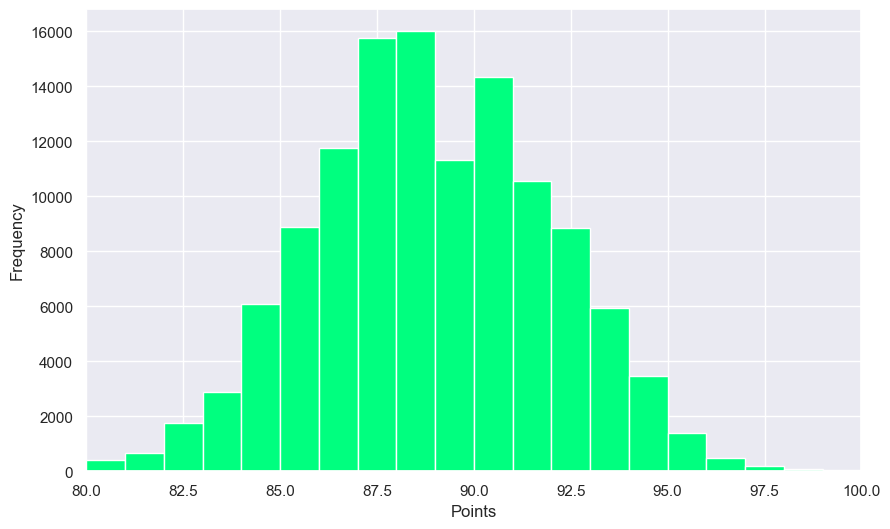

In [18]:
# plot the distribution of points
plt.figure(figsize=(10,6))
bin_edges = np.arange (80, dataset['points'].max()+1, 1)
plt.hist(data = dataset, x = 'points', bins = bin_edges, color = 'springgreen')
plt.xlim(80,100)
plt.xlabel('Points')
plt.ylabel('Frequency');

As shown from the above plot, there is approximately a normal distribution of points ranging from 80-100. 

Let's see which countries are in the top 10 countries of produce the most wine, not necessarily the best.

In [19]:
# top 10 wine producing countries
country_most = dataset.country.value_counts()[:10]
country_most

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

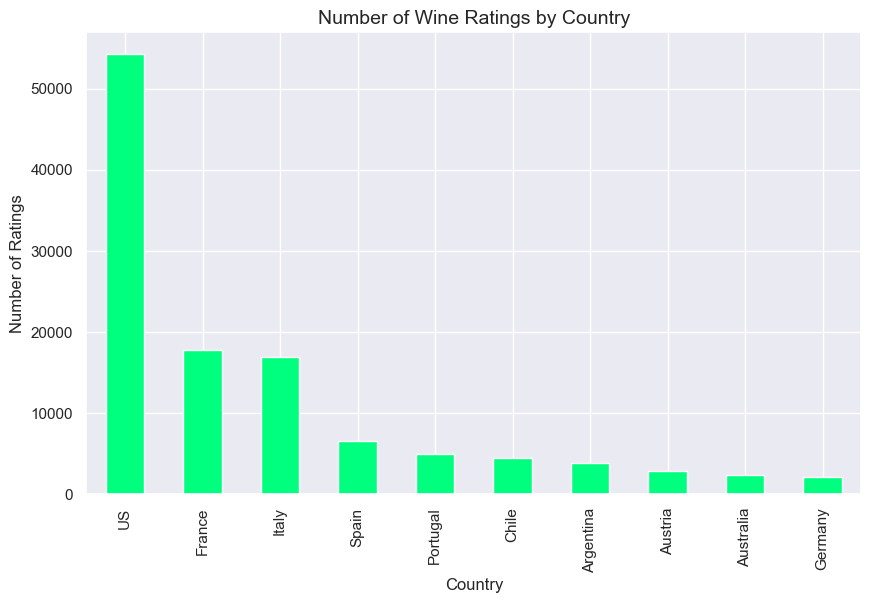

In [20]:
# plotting the countries with the most wine produced according to the dataset
plt.figure(figsize=(10,6))
country_most.plot(kind='bar', color = 'springgreen')
plt.title('Number of Wine Ratings by Country', fontsize = 14)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

From the graph above we can see that the top 10 countries who produce the most wine are: US, France, Italy, Spain, Portugal, Chile, Argentina, Austria, Australia, and Germany. This is similar to what I would have guessed so no surprises here. Ok, now let's look at how many countries produce wine of the best quality according to our ratings.

In [23]:
# group numerical variables by country 
produce_countries_mean = dataset.groupby('country').mean(numeric_only=True)
produce_countries_mean

,points,price
country,,
Argentina,86.710330,24.510117
Armenia,87.500000,14.500000
Australia,88.595466,35.437663
Austria,90.190782,30.762772
Bosnia and Herzegovina,86.500000,12.500000
Brazil,84.659574,23.765957
Bulgaria,87.936170,14.645390
Canada,89.377953,35.712598
Chile,86.495130,20.787316


In [24]:
# create df with 10 countries with most average points
ten_countries_most_average = produce_countries_mean.sort_values(by='points', ascending=False)[:10]
ten_countries_most_average

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598
Hungary,89.165517,40.648276
China,89.000000,18.000000
France,88.734867,41.139120
Luxembourg,88.666667,23.333333


In [25]:
# convert countries to series for plotting
y_vals = ten_countries_most_average.index.to_series()

In [26]:
# get points as the x-variable
x_vals = ten_countries_most_average['points']
x_vals

country
England       91.550725
India         90.222222
Austria       90.190782
Germany       89.836321
Canada        89.377953
Hungary       89.165517
China         89.000000
France        88.734867
Luxembourg    88.666667
Italy         88.618186
Name: points, dtype: float64

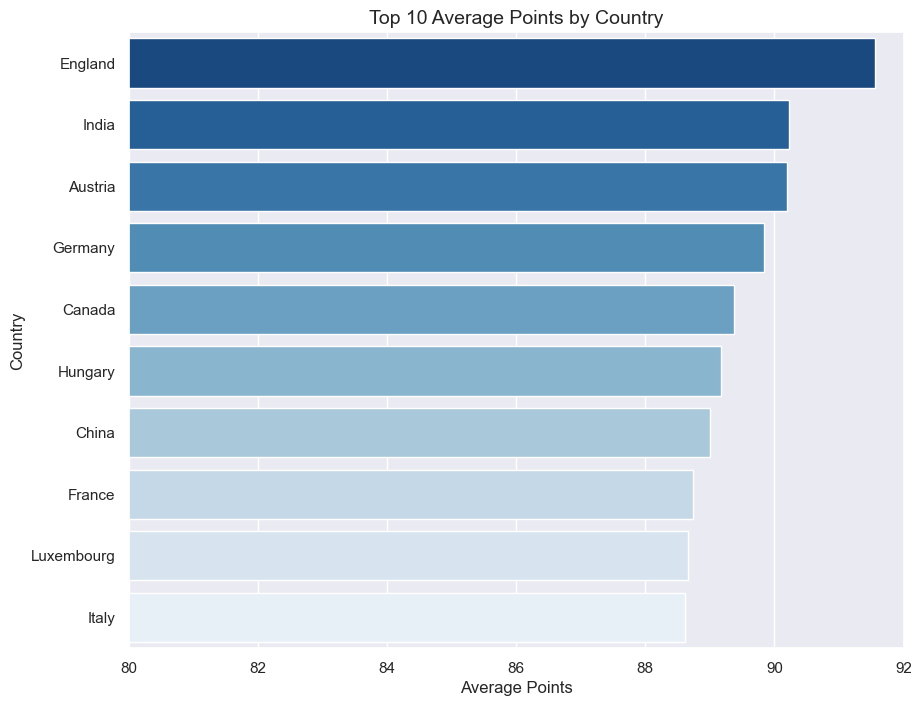

In [27]:
plt.figure(figsize=(10,8))
plt.xlim(80, 92)
sns.barplot(x=x_vals, y=y_vals, color='springgreen', palette='Blues_r')
plt.title('Top 10 Average Points by Country', fontsize = 14)
plt.xlabel('Average Points')
plt.ylabel('Country');

Somewhat surprisingly, when looking at the highest average points per country it was England that produced the best quality wine. This is perhaps because there are fewer wines from England in the dataset and they have scored high therefore increasing the mean. It is worth investigating this further, let's look at those with scores over 95, i.e. the superb wines according to the Wine Enthusiast Rating system. 

In [28]:
dataset.points.describe()

count    120915.000000
mean         88.421726
std           3.044954
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [29]:
high_scorers = dataset[dataset['points'] >= 95]
high_scorers

,country,description,points,price,province,region_1,title,variety,winery,year
345,Australia,This wine contains some material over 100 year...,100,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,NaN
346,Australia,"This deep brown wine smells like a damp, mossy...",98,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,NaN
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",97,775.0,Rheingau,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,2014
348,Australia,Deep mahogany. Dried fig and black tea on the ...,97,100.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards,NaN
349,Australia,"RunRig is always complex, and the 2012 doesn't...",97,225.0,South Australia,Barossa,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,2012
...,...,...,...,...,...,...,...,...,...,...
128270,US,"Monumentally detailed, this 100% Cabernet Sauv...",97,65.0,California,St. Helena,Redmon 2006 Cabernet Sauvignon (St. Helena),Cabernet Sauvignon,Redmon,2006
128271,Spain,"Concentrated to the hilt, with molten black fr...",96,82.0,Northern Spain,Rioja,Remírez de Ganuza 2005 Old Vines Unfiltered (...,Tempranillo Blend,Remírez de Ganuza,2005
128682,US,Easy to like a lot now for its terrifically ri...,95,38.0,California,Russian River Valley,Dutton Estate 2007 Dutton Ranch Karmen Isabell...,Pinot Noir,Dutton Estate,2007
128683,US,"Big, powerful, soft, rich and ageable. In othe...",95,90.0,California,Carneros,Etude 2006 Heirloom Estate Grown Pinot Noir (C...,Pinot Noir,Etude,2006


In [30]:
# number of wines from each country scoring the highest ratings of 95-100 points
high_scorers.country.value_counts()

US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: country, dtype: int64

In [31]:
# number of wines from each country in the dataset
dataset.country.value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

As shown from above, the countries which achieved a rating of 95-100 points for their wines differ from our plot of the highest scorers based on their means. A barplot will allow us to see the max, min and mean scored by each country in the dataset which should paint a clearer picture of which countries score the highest points. Since this dataset contains more US wines it is likely that there will be a broad range of wines from the country whereas England which received the best average score has fewer wines in the dataset which is an unfair comparison.

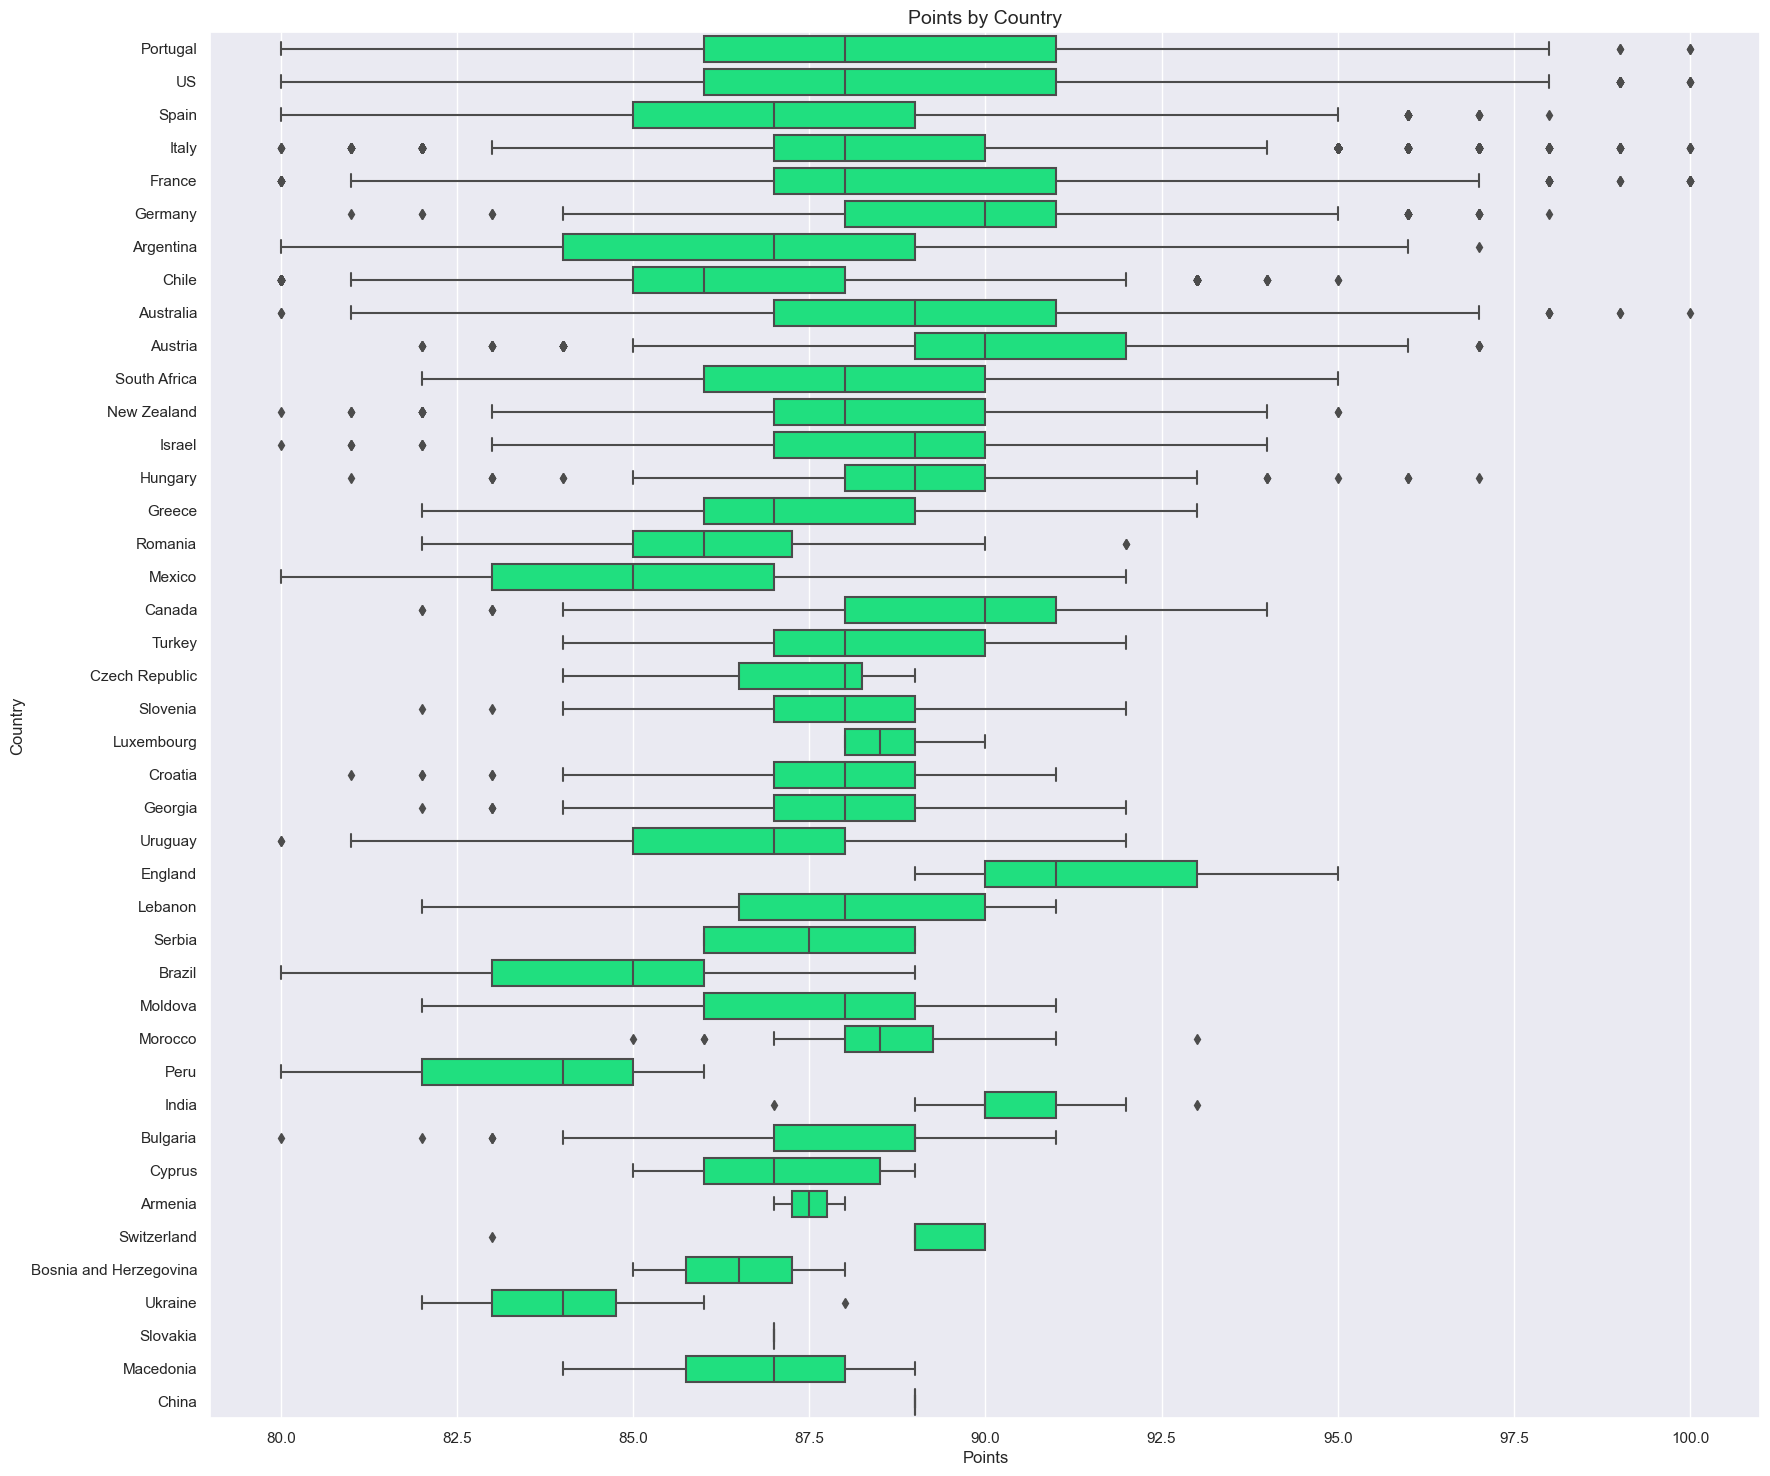

In [32]:
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = dataset, x = 'points', y = 'country', color = 'springgreen')
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

As shown from the boxplot above it is clear that although wines from England had the highest points on average, wines from Portugal, the US, Italy, France, and Australia made wines which received a perfect score of 100. There are many more wines from these countries in the dataset therefore there is a wider range of scores they received.

In [33]:
# count of province
wine_prov = dataset.province.value_counts()[:10]

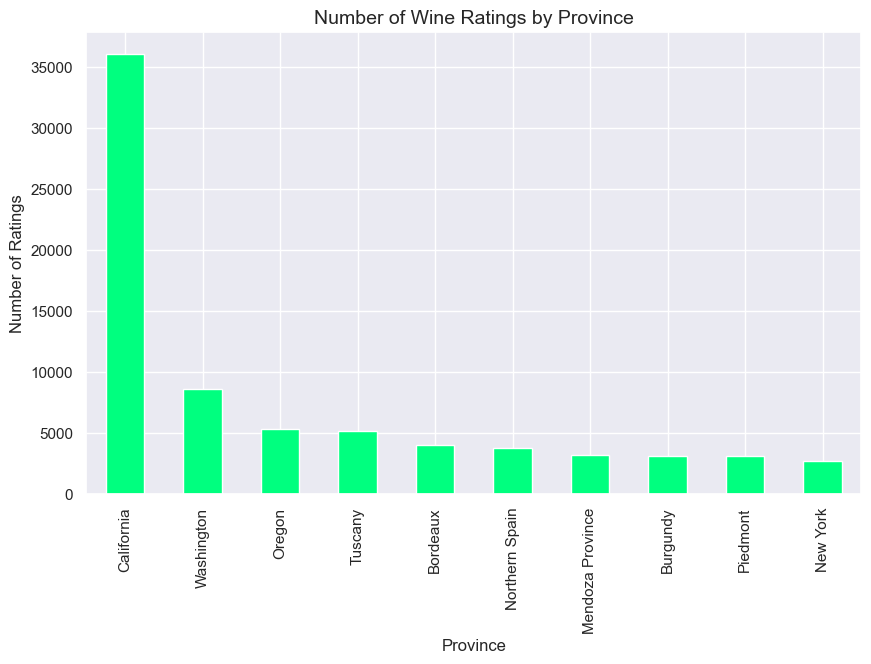

In [34]:
plt.figure(figsize=(10,6))
wine_prov.plot(kind='bar', color = 'springgreen')
plt.title('Number of Wine Ratings by Province', fontsize = 14)
plt.xlabel('Province')
plt.ylabel('Number of Ratings');

Unsurprisingly, the most popular province in this dataset is California. The most reviewed country was the US, so it was predictable that California would be the province to have the most wines reviewed.

Now that we've seen the different distribution of quality of wine from each country, let's investigate the price of wine from different countries. 

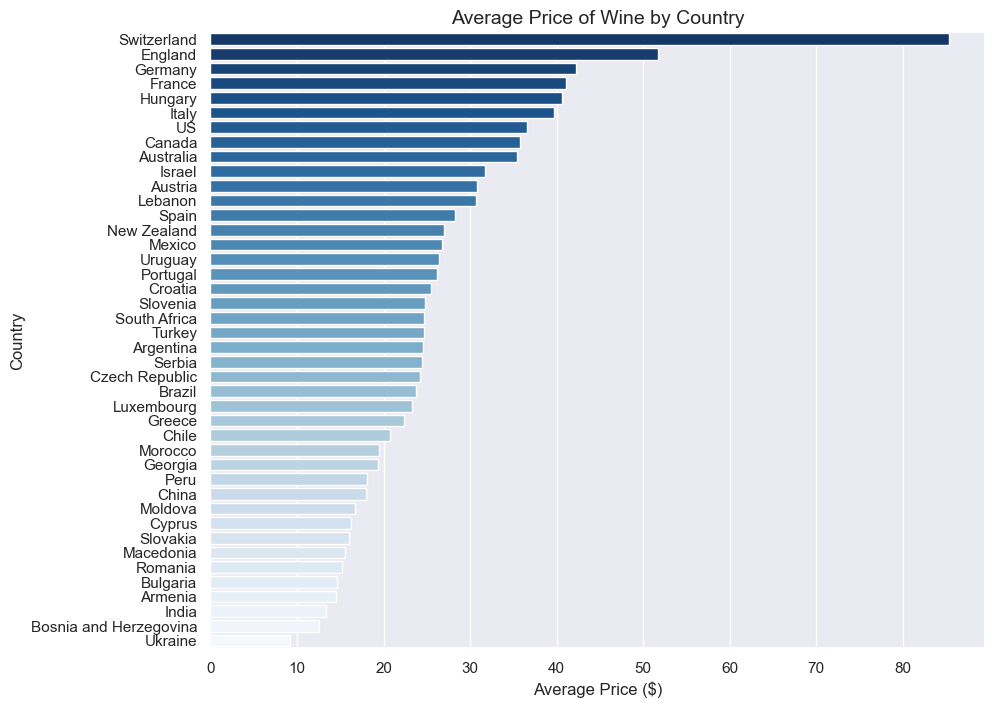

In [35]:
wine_price_mean = dataset.groupby('country').mean(numeric_only=True)
wine_price_mean_sort = wine_price_mean.sort_values(by='price', ascending=False)
y_val = wine_price_mean_sort.index.to_series()
x_val = wine_price_mean_sort['price']

plt.figure(figsize=(10,8))
sns.barplot(x=x_val, y=y_val, palette='Blues_r')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

Switzerland produces the most costly wine, with the average price being over $\$$80 for a bottle. Wine from Ukraine is on the other end of the spectrum with the average price being under just 10 dollars.

#### Is Price Related to Quality of Wine?

First I will look at the distribution of wine prices.

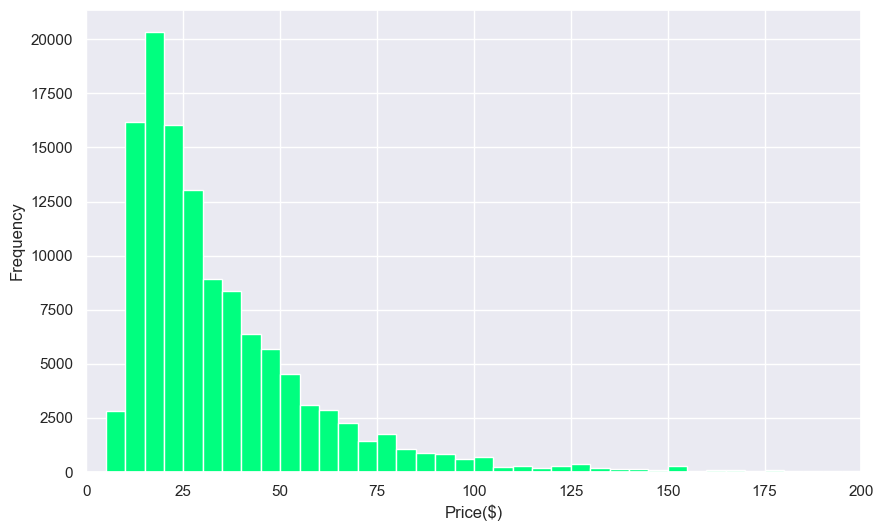

In [36]:
# plotting price distribution
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, dataset['price'].max()+5, 5)
plt.hist(data = dataset, x = 'price', bins = bin_edges, color = 'springgreen')
plt.xlim(0,200) # cut the x-axis at 200
plt.xlabel('Price($)')
plt.ylabel('Frequency');

As shown from the graph above, price data is highly skewed to the right. To gain a better understanding of the distribution, I will apply a logarithmic transformation.

In [37]:
dataset['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [38]:
np.log10(dataset['price'].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

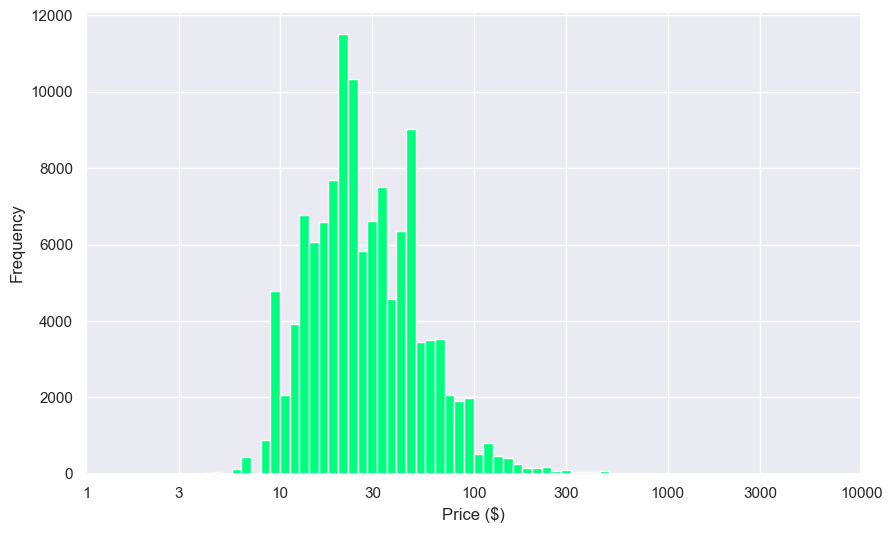

In [39]:
# plotting price distribution on a log scale
plt.figure(figsize=(10,6))
bin_edges = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data = dataset, x = 'price', bins=bin_edges, color = 'springgreen')
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

The graph above highlights an approximately log-normal distribution. There is a jump around the 10 dollar mark, and a clear peak at just over 20 dollars. There is another peak at wines priced just over $50. 

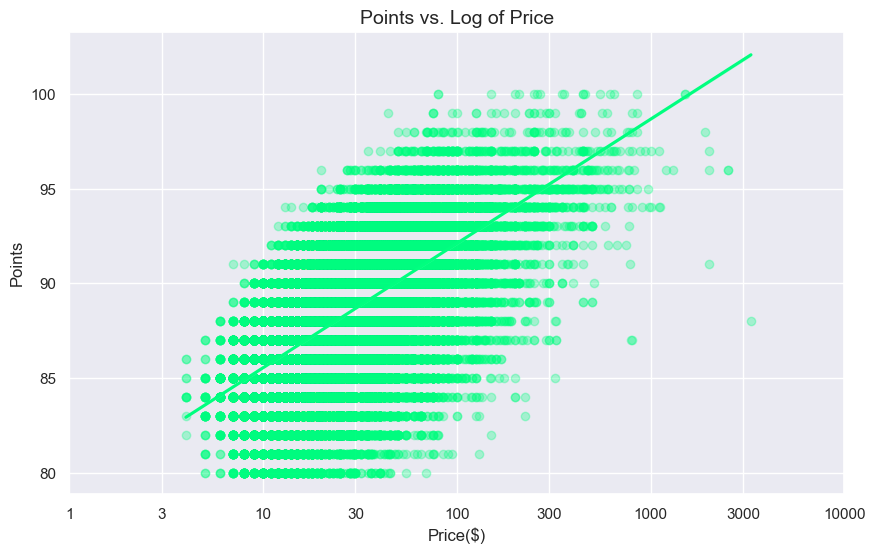

In [40]:
# plotting a scatter plot of relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data = dataset, color = 'springgreen', logx = True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Log of Price", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
plt.xlabel("Price($)")
plt.ylabel("Points");

As shown from the scatterplot, there is a positive relationship between points and price, with more expensive wines tending to receive better ratings.

In [41]:
# the lowest priced wine
dataset.loc[dataset['price'].idxmin()]

country                                                    Spain
description    Berry and cherry aromas are surprisingly sturd...
points                                                        85
price                                                        4.0
province                                           Central Spain
region_1                           Vino de la Tierra de Castilla
title          Felix Solis 2013 Flirty Bird Syrah (Vino de la...
variety                                                    Syrah
winery                                               Felix Solis
year                                                        2013
Name: 1987, dtype: object

In [42]:
# the highest priced wine
dataset.loc[dataset['price'].idxmax()]

country                                                   France
description    This ripe wine shows plenty of blackberry frui...
points                                                        88
price                                                     3300.0
province                                                Bordeaux
region_1                                                   Médoc
title                       Château les Ormes Sorbet 2013  Médoc
variety                                 Bordeaux-style Red Blend
winery                                  Château les Ormes Sorbet
year                                                        2013
Name: 80290, dtype: object

In [43]:
pd.options.display.max_colwidth = 500
dataset[dataset['price']==df['price'].min()][:1]

,country,description,points,price,province,region_1,title,variety,winery,year
1987,Spain,"Berry and cherry aromas are surprisingly sturdy and clean. Freshness is maintained on the palate, which is honest enough to offer modest tannic bite. Lightly spiced plum and raspberry flavors change little on an easy finish.",85,4.0,Central Spain,Vino de la Tierra de Castilla,Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla),Syrah,Felix Solis,2013


In [44]:
dataset[dataset['price']==df['price'].max()]

,country,description,points,price,province,region_1,title,variety,winery,year
80290,France,"This ripe wine shows plenty of blackberry fruits balanced well with some dry tannins. It is fresh, juicy with plenty of acidity, For a light vintage, it's perfumed, full of fresh flavors and will be ready to drink from 2017.",88,3300.0,Bordeaux,Médoc,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,2013


### 2. Best Wine in Each Price Range?

We now know that quality is indeed related to price, but we can't all afford to splurge on a $\$$3000 bottle of wine every week so let's find out how to get the best bang for your buck in each price range.

#### Under $\$$15

In [45]:
cheap = dataset[dataset['price']<=15]
cheap.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
19136,Spain,"A spectacularly sweet and rich bruiser, and one that delivers the essence of raisins, toffee and chocolate. This wine hasn't taken one turn south, and it's beckoning to be consumed. The finish is impeccably smooth and rich, and while its luscious to say the least, the amazing thing is its length, which runs a couple of minutes, no joke. A guarantee for anyone who loves the hedonistic combination of sweet fruit, brown sugar and chocolate.",94,14.0,Andalucia,Jerez,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry,Osborne,1827
23974,Portugal,"Assobio is from a single vineyard in the Quinta dos Murças estate. A powerful, structured expression of Douro wine, it has black fruits, dark tannins, some subtle layers of wood aging and great concentration. Dark and richly fruity, it needs to mature before drinking. Wait until 2017.",94,13.0,Douro,NaN,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Quinta dos Murças,2011
12255,South Africa,"This big boy greets us with his deep ruby/black cloak. Loaded with cassis from start to finish, there is tremendous fruit depth here and a full, supple mouthfeel. Reminiscent of one of the successful large-scale ‘97 California Cabernets. Has tannins to resolve, best held for a year or two.",93,15.0,Stellenbosch,NaN,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon,Simonsig,1998
129572,France,"It's hard to believe it's possible to buy this quality rosé for so little money. Mouthwatering scents of raspberry, stone fruit and crushed stone emerge from the glass, followed by rich, ripe fruit flavors balanced by just-enough citrusy acidity. It's full-bodied and plush, yet vibrant and long on the finish.",93,15.0,Rhône Valley,Tavel,Domaine des Carteresses 2016 Tavel,Rosé,Domaine des Carteresses,2016
37882,Australia,"Writes the book on how to make a wine filled with gigantic jammy fruit that's nonetheless dry, balanced and harmonious. The Cabernet contributes blackcurrants and structural tannins. The Syrah brings a peppery richness, while Merlot adds soft fruitiness. You can actually taste each varietal, yet the wine hangs together, dry and rich. Best Buy.",93,15.0,Australia Other,South Eastern Australia,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend,Marquis Philips,2000
74042,France,"It's hard to believe it's possible to buy this quality rosé for so little money. Mouthwatering scents of raspberry, stone fruit and crushed stone emerge from the glass, followed by rich, ripe fruit flavors balanced by just-enough citrusy acidity. It's full-bodied and plush, yet vibrant and long on the finish.",93,15.0,Rhône Valley,Tavel,Domaine des Carteresses 2016 Tavel,Rosé,Domaine des Carteresses,2016
52776,US,"Uvaggio is making a serious case for Lodi Vermentino. This bottling is compelling: savory with herb and green olive notes, and yet freshly fruity and delicate, well integrated and plenty acidic to stand up to a wide range of food, even given its modest 11% alcohol level. A stunner that'll keep you thinking, and asking for more.",93,14.0,California,Lodi,Uvaggio 2009 Vermentino (Lodi),Vermentino,Uvaggio,2009
43193,US,"This is a very sweet, unctuous dessert wine, with the flavor and texture of honey. Made from Viognier, it has decadent apricot, peach, tangerine and crème brûlée notes that combine in a dense, delicious mélange.",93,14.0,California,Russian River Valley,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier,Novy,2006
9609,France,"A rich, Port-like wine that is full and concentrated while also soft and fruity. It is powerfully structured, with a balance of great acidity to balance the dry tannins, imparting a fine texture. An impressive wine that will need many years to age. Drink from 2017.",93,13.0,Southwest France,Cahors,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot,Château Vincens,2011
59823,US,"This is a very swee

For this situation, you could bag yourself a 94 point wine for only $\$$13 by opting for a nice Portugese Quinta dos Murças 2011 Assobio Red (Douro). 

#### From $\$$15 to $\$$30

In [46]:
low_mid = dataset.query("price > 15 and price <= 30")
low_mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
54311,Austria,"This wines arrives on tiptoe, citrus-scented and fresh, but once it expands on your palate it soon fills the mouth with all manner of stone fruits. As befits this vintage, everything is tempered with grapefruit zestiness but both mirabelle and apricot richness not only lend flavor but also a beautiful texture that insinuates quince and blood orange zest. What a triumph, what a marvel. Irresistible now but with incredible concentration this is built to last. Drink now till 2020 at least.",96,28.0,Kamptal,NaN,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling,Eichinger,2014
81902,US,"This is as good as the best from California—textural, creamy, a delicious mix of lemon custard, meringue, caramel, papaya and toasted coconut. At one quarter the price of comparable bottles, this young wine just seduces from the instant it hits the tongue.",96,30.0,Washington,Columbia Valley (WA),Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay,Efeste,2009
45992,France,"With its apricot and honeyed flavors, this is a rich wine. It has intense, ripe fruit and layers of spice and botrytis. A dry core gives it its great richness and aging potential. Drink from 2024.",96,28.0,Bordeaux,Sauternes,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,Château Filhot,2014
102489,US,"Even if winemaker Jason Lett tripled the price of this wine, it would still be a standout among its peers. This opens with intense aromatics of pineapple fruit, bracing acidity and compelling length. On the second and third day after opening, it remained quite fresh and expressive, with further details of fruit and mineral beginning to emerge. Drink now through 2035.",96,27.0,Oregon,Dundee Hills,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay,The Eyrie Vineyards,2014
119658,Spain,"One of the world's best PX wines is Solera 1927, the pride of Alvear. Whatever solera stocks went into this bottling were well selected. Aromas of maple and fine wood turn to fig and caramel. Saturation and weight on the palate are expected, but this has some (though not a lot) acidic cut. Deep flavors of fig and Nutella finish with nuttiness and warmth. Drink or hold.",96,30.0,Andalucia,Montilla-Moriles,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez,Alvear,1927
101580,US,"Superb fruit highlights this tight, sculpted Syrah. It's extremely dense, with deep and intense raspberry and cassis fruit flavor, augmented with coffee grounds, smoke and iron filings. Complex, detailed, balanced and deep—what more can a wine give you? This is drinking very young and surely needs to be decanted. But already displaying amazing power.",96,20.0,Washington,Columbia Valley (WA),Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,Rulo,2007
9901,France,"A touch of lemon balm adds a breezy freshness to the nose, while a pure, bright and precise notion of ripe lemon pervades and takes over the entire palate. On its fringes, delicious hints of chamomile and chervil appear alongside ripe red apple. This is a tantalizing charmer in spite of its absolute dryness and vivid acidity. Drink 2017–2037.",96,29.0,Alsace,Alsace,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling,Domaines Schlumberger,2014
40309,Italy,"This stunning Chianti Classico has an intense perfume of violet, rose and iris, accented with scents of truffle and forest berry. The wildly delicious palate presents a core of juicy cherry layered with sweet pipe tobacco, mint and spice, with a hint of well-integrated oak. It has great energy, with vibrant acidity and bracing but refined tannins. Drink 2016–2025.",96,27.0,Tuscany,Chianti Classico,Isole e Olena 2010 Chianti Classico,Red Blend,Isole e Olena,2010
109845,US,"This ultra reserve, made in half bottles only, is labeled the winery's best offering. It lives up to the claim, with stunningly rich and broad flavors of black fruits, dusty cedar, tob

There is a great selection of wines here if you are willing to spend a little more. The best value would be a $20 Syrah from the US scoring a whooping 96 points!

#### From $\$$30 to $\$$50

In [47]:
mid = dataset.query("price > 30 and price <= 50")
mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
118059,US,"Shows classic, full-throttle notes of tropical and citrus fruits, pears and sweet green apples, combined with strong minerality and complex layers of buttered toast, honey and creamy lees. The description alone hardly does justice to the wine's beauty. The acidity is perfect, the oak deftly applied, the finish long and completely satisfying. Winemaker Ehren Jordan suggests pairing it with simple fare like roast chicken and salted fingerling potatoes.",99,44.0,California,Sonoma Coast,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay,Failla,2010
1560,US,"A stunning Pirouette—63% Cabernet Sauvignon, 22% Merlot, 9% Cab Franc and 6% Petit Verdot. Full and magnificently rich, it is loaded with dense and thrilling fruit flavors of black cherry and cassis. A streak of iron and a hint of citrus keep the wine evolving through a long, beautifully balanced finish. Retasted after being open for 24 hours, the wine was as fresh and thrilling as on the first day.",98,50.0,Washington,Columbia Valley (WA),Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend,Pirouette,2008
47432,US,"This wine shows real first-growth quality in its intensity and concentration, with orange nectar, golden mango, pear, peach pie, buttercream, vanilla, buttered toast and spice flavors. The balance is exquisite, and the way the acids dance along the palate make the wine clean and lively.",97,50.0,California,Russian River Valley,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay,Williams Selyem,2010
4504,US,"This wine is insanely good, from a dry-farmed, yes, rocky outcropping of vines planted first in 1910, then again in 1934 and the 1970s, with Carignane and Petite Sirah in the mix. It's thick, rich and beautifully put-together, full bodied and entirely balanced, with markings of cherry cordial and white pepper that seduce gently.",97,50.0,California,Russian River Valley,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel,Limerick Lane,2013
114981,US,"A seriously top of the heap California Syrah. This complex, interesting wine sings of black pepper and garrigue, fleshy in just-ripe cherry, leather and dark plum. From the mountainous Fenaughty Vineyard, always a good source, it finishes long and will age gorgeously if you can possibly wait to drink it; that pepper will mellow in interesting ways.",97,35.0,California,El Dorado,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah,Donkey & Goat,2010
45986,France,"Powered by intense botrytis, this wine is opulent and ripe, with spice, yellow fruit and honey flavors. It has just the right balance of acidity to maintain its shape and proportions. It's likely to age well over many years. Drink from 2024.",97,45.0,Bordeaux,Barsac,Château Coutet 2014 Barsac,Bordeaux-style White Blend,Château Coutet,2014
125831,US,"The cold and fog actually helped this Chardonnay, which achieves a remarkable delicacy and tartness despite the power of its fruit. Really remarkable for the flood of golden mango, Asian pear and Key lime pie richness, which is grounded by a firm minerality. Oak influence and aging on the lees lend the perfect touches of smoky, buttered toast and zesty creaminess to this dry, polished wine. A mere 587 cases were produced.",97,50.0,California,Green Valley,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay,Dutton-Goldfield,2010
16524,Portugal,"This is a superb blend of aged tawny Ports, blended to celebrate the company's 325th anniversary. Filled with rich fruit, it has great depth and spicy richness although it is also impressively fresh. Dried fruits and red plums are lifted with a hint of smoky wood and good acidity. Like any tawny Port, it is ready to drink.",97,40.0,Port,NaN,Taylor Fladgate NV 325 Anniversary (Port),Port,Taylor Fladgate,325
128268,US,"A monumental Cabernet that succeeds on every

If you like a Chardonnay and are in the mood to treat yourself and your dinner guests then you couldn't go far wrong with a wine scoring 99 points for only $\$$44. 

#### Above $\$$50

In [48]:
high = dataset.query("price > 50")
high.sort_values(by='points', ascending=False)[:20]

,country,description,points,price,province,region_1,title,variety,winery,year
113929,US,"In 2005 Charles Smith introduced three high-end Syrahs. In 2006 Smith has made a wine better than each of these, by combining them into a single wine—Royal City Syrah. Rich scents of purple fruit, smoked meat, cedar, lead pencil, moist earth and so on proclaim a wine with genuine gravitas. There is nothing missing, from the first sniff to the last sip, the wine delivers on all levels. Complex, beautifully balanced, powerful and detailed.",100,80.0,Washington,Columbia Valley (WA),Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah,Charles Smith,2006
111755,France,"This is the finest Cheval Blanc for many years. It is, quite simply, magnificent. The wine shows the greatness of Cabernet Franc in the vintage, with 57% of the variety in the blend. It is beautifully structured and perfumed, with velvety tannins, balanced acidity and swathes of black-currant and black-cherry fruits. It's well on course to becoming a legendary wine.",100,1500.0,Bordeaux,Saint-Émilion,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc,2010
89728,France,"This latest incarnation of the famous brand is a superb wine. It is on par with, maybe even better than, the already legendary 2002. Its balance is impeccable: Apple and citrus flavors working with the tight minerality to give a textured yet fruity wine. Produced from Roederer's own vineyards which are mainly biodynamic, the wine has its own intense purity and crispness. It has amazing potential and is likely to age for many years. Drink from 2020.",100,250.0,Champagne,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend,Louis Roederer,2008
123545,US,"Initially a rather subdued Frog; as if it has been tamed down. Then, suddenly, There's a plush core of blackberry fruit, and the classic Cayuse funkiness is there, drenched in liquid rocks and cured meat and drying tannins. It's all in proportion and a fine reflection of the steely vintage. As it opens gracefully you discover that it is a stunningly refined Frog, quite possibly the best ever; powerful and distinctive, but also elegant, feminine.",100,80.0,Washington,Walla Walla Valley (WA),Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah,Cayuse,2008
118058,US,"This wine dazzles with perfection. Sourced from vineyards throughout Sonoma County, it refutes the belief that a great Cabernet must come from a single vineyard. It does not. The master's art of blending, coupled with demanding vineyard practices lends completeness. The blend is 85% Merlot, 10% Cabernet Franc and 5% Malbec, making it an extraordinary success despite the absence of Cabernet Sauvignon. Give credit to winemaker Pierre Seillan. The wine itself is absolutely dry. It starts with a...",100,450.0,California,Sonoma County,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité,2007
89729,France,"This new release from a great vintage for Chardonnay in Champagne is a perfect blanc de blancs, showing a wealth of intensity from the crisp, chalky, mineral tones to the perfumed apple notes. The aromas hint at developing toastiness that adds depth and complexity. The wine is still young and it will age for years. Drink from 2020.",100,617.0,Champagne,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay,Salon,2006
45781,Italy,"This gorgeous, fragrant wine opens with classic Sangiovese scents of violet, rose, perfumed red berry, new leather and a whiff of baking spice. The elegant, radiant palate delivers crushed Marasca cherry, ripe strawberry, cinnamon, black tea and a hint of pipe tobacco. Firm, ultrafine tannins and bright acidity offer an age-worthy structure and impeccable balance. It's already stunning but will evolve for decades. Drink 2020–2050.",100,550.0,Tuscany,Brunello di Montalcino,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese,Biondi Santi,2010
111753

For the not outrageous cost of $\$$80 you can experience what 100 points tastes like by purchasing the Charles Smith 2006 Royal City Syrah. We'd take this anyday over the $\$$3300 bottle which scored 12 points less!

### 3. What words are most used when describing wine​?

In [49]:
# start with one review
text = dataset.description[1]
# combine all wine reviews into one big text
text = " ".join(review for review in dataset.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 29653210 words in the combination of all review.


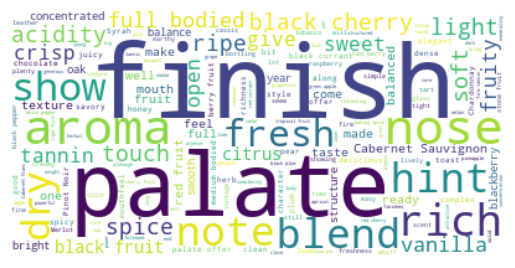

In [50]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, I would like to put this word cloud into the shape of a wine glass and wine bottle image. First I need to check the numpy array form. 

In [51]:
# to make sure the mask works by looking at numpy array form:
wine_mask = np.array(Image.open("./data/wine_mask.png"))
wine_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

For the masking function to work, all the white parts of the mask should be 255 not 0 (int type). Values of 255 are white and values of 1 are black. The function below transforms the mask by swapping 0 for 255 and is applied to each value in each row of the mask. Then a new mask is created with the same shape as the previous mask

In [52]:
def transform_format(val):
    """Converts int 0 input to int 255. Else returns input."""
    if val == 0:
        return 255
    else:
        return val

In [53]:
# Transform your mask into a new one
transformed_wine_mask = np.where(wine_mask == 0, 255, wine_mask)
# Check the expected result of the mask
transformed_wine_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

As we can see the function worked as we wanted it to and now I can start making the wordcloud in the shape of the wine bottle. In the WordCloud function there is a mask argument that takes in the transformed mask. The contour_width and contour_colour are arguments to change the outline characteristics of the cloud. 

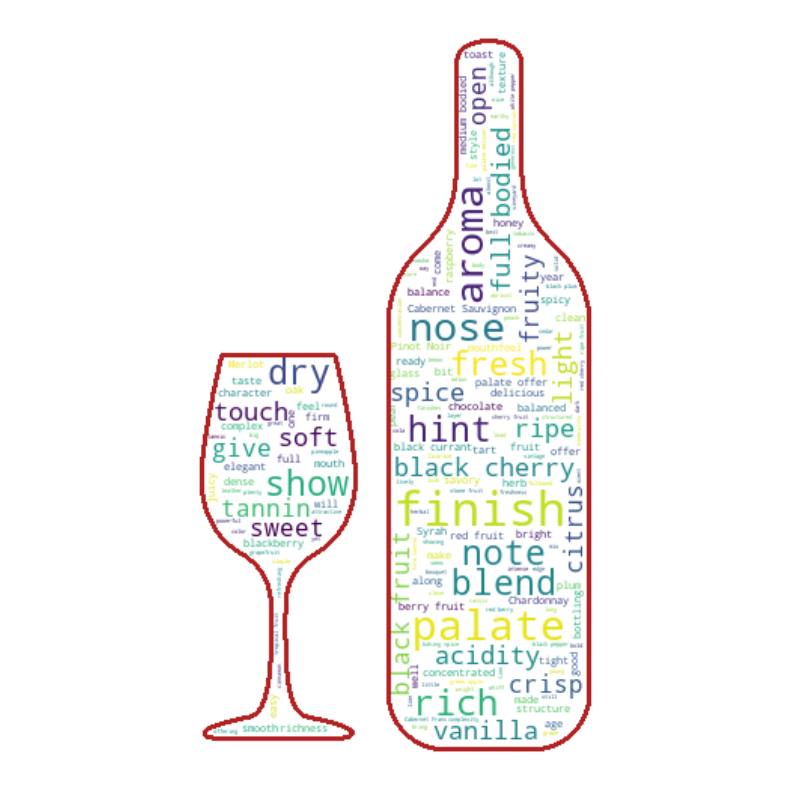

In [54]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("./data/wine-wordcloud.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusions

 - On average, England makes Superb wine. But if you want a bottle with a perfect score of 100, you should look to the usual suspects: France, Italy, Portugal, the US, or Australia.
 - Price is related to quality. However, knowing where to look, you can bag a $\$$4 wine that scores only 3 points below a $\$$3300 bottle.
 - All varieties of wine are equal but my selection on the Pinot Noir. 
 - There is a perfect wine for every situation and every budget, with clear standout performers in each bracket. 
 - Certain words come up time and time again in wine reviews.

## Resources

Here are some resources that I used during data analysis

https://www.kaggle.com/zynicide/wine-reviews  
https://www.wine-searcher.com/critics-17-wine+enthusiast       
https://www.winemag.com    
https://stackoverflow.com/questions/37683558/pandas-extract-number-from-string         
https://stackoverflow.com/questions/33005872/seaborn-regplot-partially-see-through-alpha     
http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot       